In [47]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

#Importing and decoding the archive that i will clean.
#Changing the options so it displays every columns, which allows me to visualize better.
data = pd.read_csv('/Users/nico/Desktop/ironhack/Sharks_data_cleansing/Data/attacks.csv', encoding='latin1')
pd.set_option('display.max_columns', None)
data.head()






# Checking types, shape and nulls
data.info(memory_usage = 'deep')


#Finding duplicated rows and eliminating them
#Checking if columns were erased
p = data[data.duplicated()]
len(p)
data_no_dups = data.copy()
data_no_dups.drop_duplicates(inplace=True)
data_no_dups.shape
data.shape



# Erasing rows with more than half of the columns with value null

dataNoNulls_no_dups = data_no_dups[data_no_dups.isnull().sum(axis=1) < 14]

dataNoNulls_no_dups.info(memory_usage = 'deep')



# filling null values with 'unknown'
dataNoNulls_no_dups['Unnamed: 22'].fillna('unknown',inplace = True)
dataNoNulls_no_dups['Unnamed: 23'].fillna('unknown',inplace = True)
dataNoNulls_no_dups['Species '].fillna('unknown',inplace = True)




# sincee there are four columns with date and we are restricted to not erasing columns, i am checking 
# for mulls in 'Date' to be able to fill them and erase the values of the rest
pep = dataNoNulls_no_dups.copy()
pep[pep['Date'].isnull()]
        


pep["Time"] = pep["Time"].replace(r"[a-zA-Z0-9-]+", np.nan, regex=True)
pep.Time.fillna('Unknown',inplace= True)
pep.head()

pep[pep['Year'].isnull()]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

/var/folders/04/59t4vh2x34534rlkgcmfybl40000gn/T/ipykernel_44451/4016340824.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataNoNulls_no_dups['Unnamed: 22'].fillna('unknown',inplace = True)
/var/folders/04/59t4vh2x34534rlkgcmfybl40000gn/T/ipykernel_44451/4016340824.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataNoNulls_no_dups['Unnamed: 23'].fillna('unknown',inplace = True)
/var/folders/04/59t4vh2x34534rlkgcmfybl40000gn/T/ipykernel_44451/4016340824.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pyda

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
187,2017.01.08.R,Reported 08-Jan-2017,NaN,Invalid,AUSTRALIA,Queensland,NaN,Spearfishing,Kerry Daniel,M,35,"No attack, shark made a threat display",NaN,Unknown,Bull shark,Liquid Vision 1/8/2017,2017.01.08.R-KerryDaniel.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.01.08.R,2017.01.08.R,6116.0,unknown,unknown
6079,1836.08.19.R,Reported 19-Aug-1836,NaN,Unprovoked,ENGLAND,Cumberland,Whitehaven,Swimming,a boy,M,NaN,FATAL,Y,Unknown,unknown,"C. Moore, GSAF",1835.08.19.R-Whitehaven.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1836.08.19.R,1836.08.19.R,224.0,unknown,unknown


In [2]:
pep.at[187,'Year'] = '2017'
pep.at[6079,'Year'] = '1836'
pep= pep.astype({'Year':'int'})
pep.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6302 entries, 0 to 6301
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             6301 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6302 non-null   int64  
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    6302 non-null   object 
 14  Species                 6302 non-null   

In [3]:
#Cleaning country
pep[pep['Country'].isnull()].head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
62,2017.11.13.R,Reported 13-Nov-2017,2017,Unprovoked,NaN,NaN,NaN,Surfing,Timur Yunusov,M,24,Puncture wounds to feet,N,Unknown,unknown,Instagram,2017.11.13.R-Timur.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.11.13.R,2017.11.13.R,6241.0,unknown,unknown
525,2014.08.00,Aug-2014,2014,Invalid,NaN,NaN,NaN,Sea disaster,Cuban refugees,M,NaN,Shark involvement prior to death not confirmed,NaN,Unknown,Shark involvement not confirmed,"Associated Press, 11/27/2014",2014.08.00-Cuban-refugees.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2014.08.00,2014.08.00,5778.0,unknown,unknown
2956,1983.00.00.d,Ca. 1983,1983,Unprovoked,NaN,English Channel,NaN,Swimming,Padma Shri Taranath Narayan Shenoy,M,NaN,Left leg bitten,N,Unknown,unknown,"Times of India, 2/5/2012",1983.00.00.d-Shenoy.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1983.00.00.d,1983.00.00.d,3347.0,unknown,unknown
3378,1970.11.00,Nov-1970,1970,Unprovoked,NaN,NaN,NaN,NaN,Heinz Plotsky,M,NaN,Extensive injuries,N,Unknown,unknown,"H.D. Baldridge (1994), SAF Case #1645",1970.11.00-NV-Plotsky.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1970.11.00,1970.11.00,2925.0,unknown,unknown
3387,1970.08.02,02-Aug-1970,1970,Invalid,NaN,Caribbean Sea,Between St. Kitts & Nevis,Sea Disaster Sinking of ferryboat Christina,NaN,NaN,NaN,"Sharks scavenged on bodies, but no record of t...",NaN,Unknown,Shark involvement prior to death was not confi...,"Rome News Tribune, 8/3/1970",1970.08.02-Christina-ferryboat.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1970.08.02,1970.08.02,2916.0,unknown,unknown


In [4]:
# Filling nulls by distinguishing where is unknown snf where unknown but st sea
pep[pd.isna(pep['Country']) & pd.isna(pep['Activity'])].fillna('Unknown', inplace = True)
pep[pep['Country'].isnull()].head()

/var/folders/04/59t4vh2x34534rlkgcmfybl40000gn/T/ipykernel_44451/166541153.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pep[pd.isna(pep['Country']) & pd.isna(pep['Activity'])].fillna('Unknown', inplace = True)


,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
62,2017.11.13.R,Reported 13-Nov-2017,2017,Unprovoked,NaN,NaN,NaN,Surfing,Timur Yunusov,M,24,Puncture wounds to feet,N,Unknown,unknown,Instagram,2017.11.13.R-Timur.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.11.13.R,2017.11.13.R,6241.0,unknown,unknown
525,2014.08.00,Aug-2014,2014,Invalid,NaN,NaN,NaN,Sea disaster,Cuban refugees,M,NaN,Shark involvement prior to death not confirmed,NaN,Unknown,Shark involvement not confirmed,"Associated Press, 11/27/2014",2014.08.00-Cuban-refugees.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2014.08.00,2014.08.00,5778.0,unknown,unknown
2956,1983.00.00.d,Ca. 1983,1983,Unprovoked,NaN,English Channel,NaN,Swimming,Padma Shri Taranath Narayan Shenoy,M,NaN,Left leg bitten,N,Unknown,unknown,"Times of India, 2/5/2012",1983.00.00.d-Shenoy.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1983.00.00.d,1983.00.00.d,3347.0,unknown,unknown
3378,1970.11.00,Nov-1970,1970,Unprovoked,NaN,NaN,NaN,NaN,Heinz Plotsky,M,NaN,Extensive injuries,N,Unknown,unknown,"H.D. Baldridge (1994), SAF Case #1645",1970.11.00-NV-Plotsky.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1970.11.00,1970.11.00,2925.0,unknown,unknown
3387,1970.08.02,02-Aug-1970,1970,Invalid,NaN,Caribbean Sea,Between St. Kitts & Nevis,Sea Disaster Sinking of ferryboat Christina,NaN,NaN,NaN,"Sharks scavenged on bodies, but no record of t...",NaN,Unknown,Shark involvement prior to death was not confi...,"Rome News Tribune, 8/3/1970",1970.08.02-Christina-ferryboat.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1970.08.02,1970.08.02,2916.0,unknown,unknown


In [5]:
index_cambiar = pep[pd.isna(pep['Country']) & pd.isna(pep['Activity'])].index

In [6]:
pep.loc[index_cambiar, ['Country', 'Activity']] = 'Unknown'
index_cambiar = pep[pd.isna(pep['Country'])]

In [7]:
#pep.loc[index_cambiar, ['Country', 'Activity']]

In [8]:
#seeing messy country values
len(pep.Country.unique())

214

In [9]:
#Cleaning fatal and giving it boolean values for averages 
pep.rename(columns={'Fatal (Y/N)': 'Fatal'}, inplace=True)
pep.Fatal.fillna('Unknown')
def clean_fatal(x):
   
    x=str(x)
    pattern1 = r'[nN]'
    pattern2 = r'[yY]'
    if x == 'Unknown':
        return np.nan
    elif re.findall(pattern1,x):
        return False
    elif re.findall(pattern2,x):
        return True
pep.Fatal = pep.Fatal.apply(clean_fatal)
pep.Fatal.head()

0    False
1    False
2    False
3    False
4    False
Name: Fatal, dtype: object

In [10]:
#cleaning country
pep['Country'].fillna('Unknown at sea',inplace= True)
def clean_country(x):
    x = str(x)
    pattern= re.findall(r'[a-zA-Z\(\)\-\?]+', x)
    if x == 'Unknown':
        return None
    elif pattern:
        return x.lower()
test = pep.copy()
test.Country = test.Country.apply(clean_country)
test.Country = test.Country.str.replace(r'[(\)\-\?]+', ' ')
len(test.Country.unique())

/var/folders/04/59t4vh2x34534rlkgcmfybl40000gn/T/ipykernel_44451/1981136078.py:12: FutureWarning: The default value of regex will change from True to False in a future version.
  test.Country = test.Country.str.replace(r'[(\)\-\?]+', ' ')


211

In [11]:
# Cleaning null values based on their activities and reducing types by globablizing 'Boat' types
test[test['Type'].isnull()]
test.at[85,'Type'] = 'Boat'
test.at[382,'Type'] = 'Questionable'
test.at[4867,'Type']= 'Boat'
test.at[5705,'Type'] = 'Questionable'
test.Type = test.Type.str.replace('Boating', 'Boat')  
test.Type = test.Type.str.replace('Boatomg', 'Boat')
print(test.Type.unique())

['Boat' 'Unprovoked' 'Invalid' 'Provoked' 'Questionable' 'Sea Disaster']


In [12]:
#Cleaning Age and using median to fill null values
data_ses =test[test['Year'] > 1950]
data_ses.Age.unique()
def clean_age(x):
    x=str(x)
    age_pattern = r'\b(\d{2})\b'  
    match = re.search(age_pattern, x)
    if match:
        age = int(match.group(1))
        return int(age)
    else:
        return np.nan
data_ses.Age = data_ses.Age.apply(clean_age)
data_ses.shape
data_ses[data_ses['Age'].isnull()]

data_ses.Age.astype('float64')
age_median = data_ses.Age.median()
data_ses.Age.fillna(age_median, inplace= True)
data_ses.Age.head()

/var/folders/04/59t4vh2x34534rlkgcmfybl40000gn/T/ipykernel_44451/132709086.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_ses.Age = data_ses.Age.apply(clean_age)
/var/folders/04/59t4vh2x34534rlkgcmfybl40000gn/T/ipykernel_44451/132709086.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_ses.Age.fillna(age_median, inplace= True)


0    57.0
1    11.0
2    48.0
3    25.0
4    25.0
Name: Age, dtype: float64

In [13]:
data_ses['Sex '] = data_ses['Sex '].str.replace('M ', 'M')
data_ses.at[1624,'Sex ']= 'M'
data_ses['Sex '].unique()


/var/folders/04/59t4vh2x34534rlkgcmfybl40000gn/T/ipykernel_44451/3485997590.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_ses['Sex '] = data_ses['Sex '].str.replace('M ', 'M')


array(['F', 'M', nan], dtype=object)

In [14]:
# Cleaning species
def clean_species(x):
    x= str(x)
    pattern = re.search(r'\d+', x)
    if not pattern:
        return x
data_ses['Species ']= data_ses['Species '].apply(clean_species) 




/var/folders/04/59t4vh2x34534rlkgcmfybl40000gn/T/ipykernel_44451/3892736126.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_ses['Species ']= data_ses['Species '].apply(clean_species)


In [15]:
data_ses[data_ses['Area'].isnull()]
lop= data_ses.copy()
lop.loc[lop['Area'].isnull(),'Area'] = lop.loc[lop['Area'].isnull(),'Country']                   
lop.Area.fillna('Unknown', inplace = True)
lop.Country.fillna('Unknown', inplace = True)
lop.Location.fillna('Unknown',inplace = True)

In [16]:
lop.info(memory_usage= 'deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4455 entries, 0 to 4454
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             4455 non-null   object 
 1   Date                    4455 non-null   object 
 2   Year                    4455 non-null   int64  
 3   Type                    4455 non-null   object 
 4   Country                 4455 non-null   object 
 5   Area                    4455 non-null   object 
 6   Location                4455 non-null   object 
 7   Activity                4140 non-null   object 
 8   Name                    4345 non-null   object 
 9   Sex                     4061 non-null   object 
 10  Age                     4455 non-null   float64
 11  Injury                  4440 non-null   object 
 12  Fatal                   4453 non-null   object 
 13  Time                    4455 non-null   object 
 14  Species                 2675 non-null   

In [17]:
lop.Injury = lop.Injury.apply(clean_country)
lop.Activity = lop.Activity.apply(clean_country)

In [18]:
lop['reset'] = lop.reset_index

In [19]:
lop['Case Number'] =lop.reset_index

In [20]:
lop['Case Number.1']= lop.reset_index

In [21]:
lop['Case Number.2'] =lop.reset_index

In [22]:
lop.info(memory_usage= 'deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4455 entries, 0 to 4454
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             4455 non-null   object 
 1   Date                    4455 non-null   object 
 2   Year                    4455 non-null   int64  
 3   Type                    4455 non-null   object 
 4   Country                 4455 non-null   object 
 5   Area                    4455 non-null   object 
 6   Location                4455 non-null   object 
 7   Activity                4448 non-null   object 
 8   Name                    4345 non-null   object 
 9   Sex                     4061 non-null   object 
 10  Age                     4455 non-null   float64
 11  Injury                  4455 non-null   object 
 12  Fatal                   4453 non-null   object 
 13  Time                    4455 non-null   object 
 14  Species                 2675 non-null   

Text(0.5, 1.0, 'Number of attacks by country')

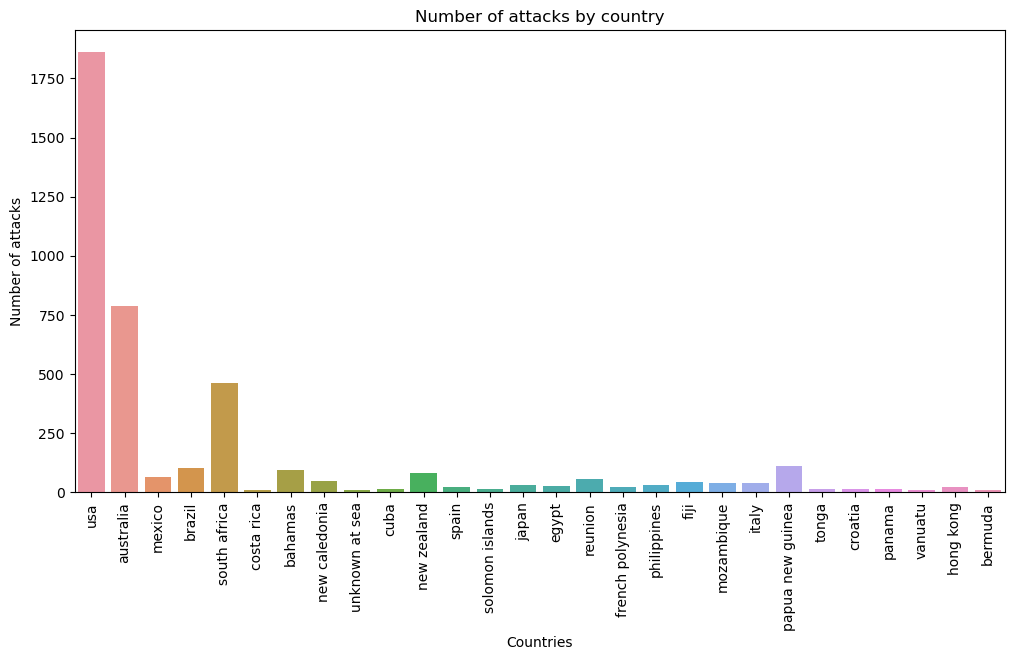

In [93]:
countries_big = lop['Country'].value_counts().loc[lambda x: x > 10].index
countries_spaced = lop[lop['Country'].isin(countries_big)]
plt.figure(figsize=(12, 6))
plt.xticks(rotation=90)
sns.countplot(x=countries_spaced.Country)
plt.xlabel('Countries')
plt.ylabel('Number of attacks')
plt.title('Number of attacks by country')

Text(0.5, 1.0, 'Number of fatal attacks by country')

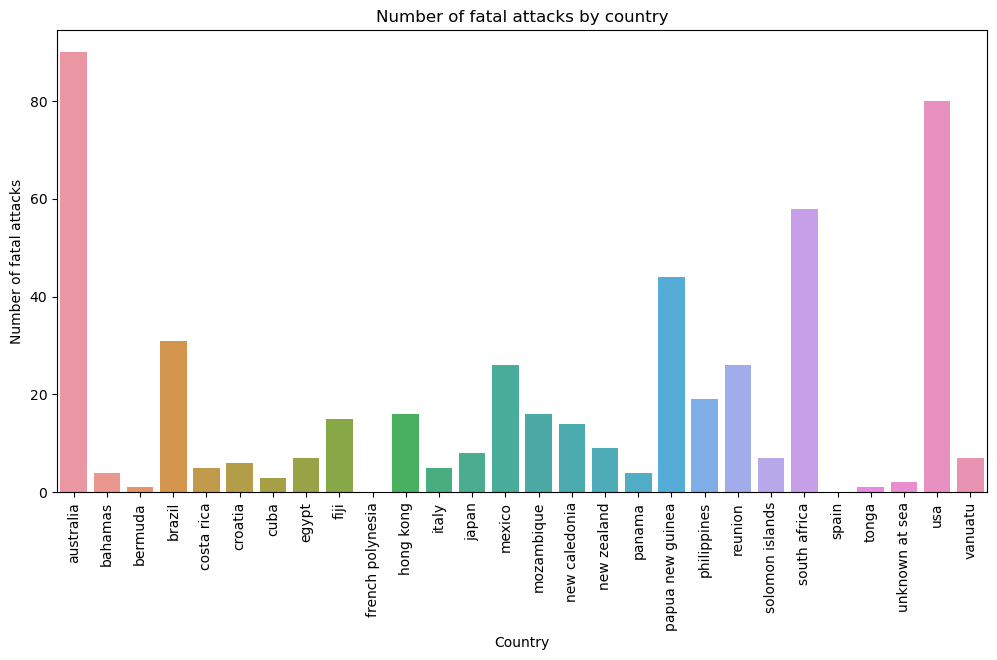

In [101]:
fatal_country = lop.groupby('Country').agg({'Fatal': 'sum'}).loc[lop.groupby('Country').size() > 10]
plt.figure(figsize=(12, 6))
plt.xticks(rotation = 90)
sns.barplot(x=fatal_country.index, y=fatal_country['Fatal'])
plt.xlabel('Country')
plt.ylabel('Number of fatal attacks')
plt.title('Number of fatal attacks by country')



Text(0.5, 1.0, 'Number of attacks by continents')

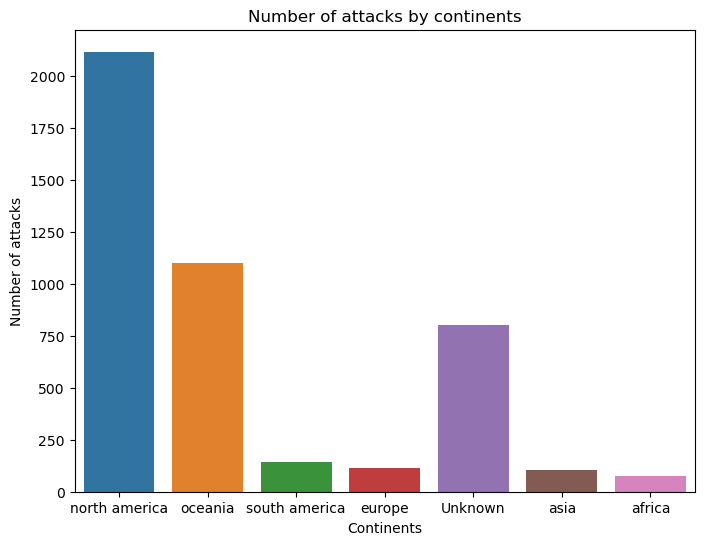

In [94]:
lop.Country.unique()
africa = ['morocco', 'libya', 'comoros', 'reunion', 'madagascar', 'sierra Leone', 'liberia', 'senegal', 'angola', 'namibia', 'gabon', 'mayotte']
asia = ['thailand', 'malaysia', 'japan', 'palestine territories', 'philippines', 'indonesia', 'china', 'taiwan', 'israel', 'india', 'hong Kong', 'bangladesh', 'singapore']
europe = ['england', 'spain', 'united Kingdom', 'france', 'italy', 'greece', 'netherlands antilles', 'croatia', 'portugal', 'malta', 'montenegro', 'turkey']
north_america = ['usa', 'mexico', 'costa rica', 'bahamas', 'cuba', 'dominican republic', 'puerto rico', 'cayman islands', 'aruba', 'mozambique', 'canada', 'jamaica', 'trinidad & tobago', 'bermuda']
south_america = ['brazil', 'ecuador', 'colombia', 'venezuela', 'chile', 'panama', 'argentina']
oceania = ['australia', 'new caledonia', 'new zealand', 'samoa', 'solomon islands', 'fiji', 'papua new guinea', 'marshall islands', 'palau']
def continent(country):
    if country in africa:
        return 'africa'
    elif country in asia:
        return 'asia'
    elif country in europe:
        return 'europe'
    elif country in north_america:
        return 'north america'
    elif country in south_america:
        return 'south america'
    elif country in oceania:
        return 'oceania'
    else:
        return 'Unknown'
lop['Continent'] = lop['Country'].apply(lambda x :continent(x))
lop['Continent'].unique()
lop.Continent.unique()
plt.figure(figsize=(8, 6))
sns.countplot(x=lop.Continent)
plt.xlabel('Continents')
plt.ylabel('Number of attacks')
plt.title('Number of attacks by continents')

Text(0.5, 1.0, 'Number of attacks by year')

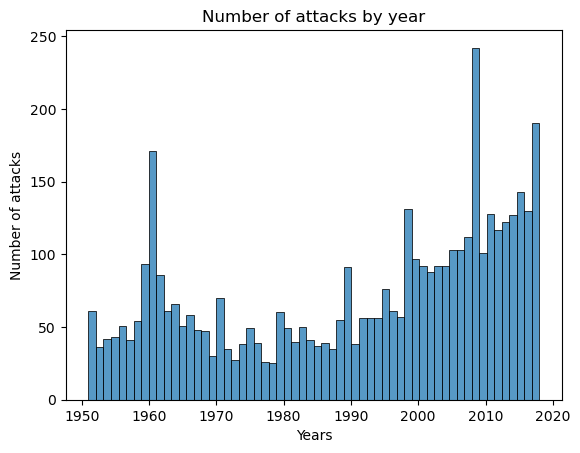

In [80]:
sns.histplot(x=lop.Year,bins= 60)
plt.xlabel('Years')
plt.ylabel('Number of attacks')
plt.title('Number of attacks by year')

In [78]:
lst50_60= list(range(1950,1960))
lst60_70=list(range(1960,1970))
lst70_80=list(range(1970,1980))
lst80_90=list(range(1980,1990))
lst90_00=list(range(1990,2000))
lst00_10=list(range(2000,2010))
lst10_20=list(range(2010,2020))


def decade(x):
    if x in lst50_60:
        return '50s'
    elif x in lst60_70:
        return '60s'
    elif x in lst70_80:
        return '70s'
    elif x in lst80_90:
        return '80s'
    elif x in lst90_00:
        return '90s'
    elif x in lst00_10:
        return '2000s'
    elif x in lst10_20:
        return '2010s'
lop['Decade'] = lop.Year.apply(decade)
lop['Decade'].unique()


array(['2010s', '2000s', '90s', '80s', '60s', '70s', '50s'], dtype=object)

Text(0.5, 1.0, 'Number of attacks by Decade')

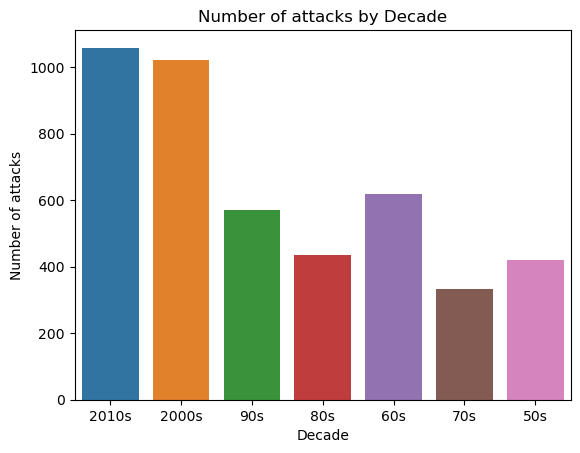

In [79]:
sns.countplot(x=lop.Decade)
plt.xlabel('Decade')
plt.ylabel('Number of attacks')
plt.title('Number of attacks by Decade')

In [54]:
pivot_lop = lop.pivot_table(index='Continent', columns='Fatal', aggfunc='size', fill_value=0)

<Axes: xlabel='Fatal', ylabel='Continent'>

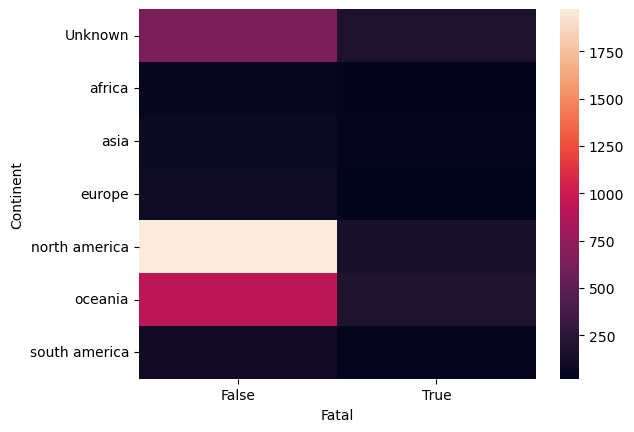

In [60]:
sns.heatmap(pivot_lop)

Text(0.5, 1.0, 'Number of fatal attacks by Continent')

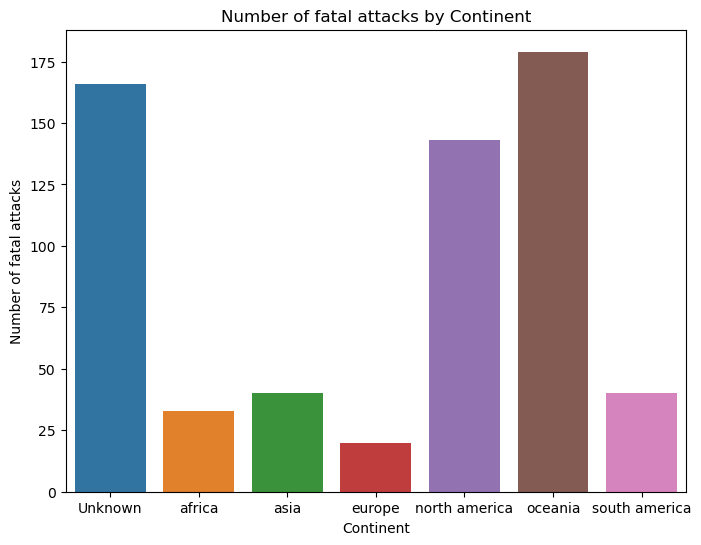

In [70]:
fatal_continent = lop.groupby('Continent')['Fatal'].sum()
plt.figure(figsize=(8, 6))
sns.barplot(x=fatal_continent.index, y=fatal_continent.values)
plt.xlabel('Continent')
plt.ylabel('Number of fatal attacks')
plt.title('Number of fatal attacks by Continent')

In [129]:
fatal_continent_year = lop.groupby(['Continent', 'Year']).agg({'Fatal': 'sum'})
lop.Fatal.fillna(0)
fatal_continent_year.tail(50)






Fatal
Continent     Year       
oceania       2011      5
              2012      2
              2013      3
              2014      5
              2015      3
              2016      5
              2017      1
              2018      0
south america 1953  False
              1954      0
              1958  False
              1959      0
              1960  False
              1961   True
              1962   True
              1963      2
              1964      1
              1965  False
              1971      2
              1974   True
              1980      2
              1981      0
              1988   True
              1991  False
              1992      2
              1993      1
              1994      2
              1995      2
              1996      1
              1997      1
              1998      2
              1999      0
              2001      1
              2002      4
              2003      1
              2004      3
              2005      0
              2006      3
              2007      0
              2008      0
              2009      2
              2010  False
              2011      0
              2012      1
              2013      2
              2014  False
              2015      0
              2016      0
              2017      0
              2018      1